# Logistic Regression

## 1. Background
A basic logistic regression attempts to classify data as successes or failures, such as pass/fail, 1/0, etc. However, it can also be generatlized for multiple classes using multinomial logistic regression.

In simple terms, it attempts to fit a logistic
function (aka. sigmoid function) that will best minimize the residual sum of squares between the observed responses in the dataset.
We first use the example of a single predictor (feature), and then extend to a model with multiple predictors (features).
The coefficients, residual sum of squares, and the variance scores are also calculated.

The logistic function can be expressed as:

\begin{equation*}
\sigma (t)={\frac {e^{t}}{e^{t}+1}}={\frac {1}{1+e^{-t}}}
\end{equation*}

Let us assume that $t$ is a linear function of a single explanatory variable
$x$ (the case where $t$ is a linear combination of multiple explanatory variables is treated similarly). We can then express $t$ as follows:

\begin{equation*}
t=\beta _{0}+\beta _{1}x
\end{equation*}

And the logistic function can now be written as:

\begin{equation*}
f(x)={\frac {1}{1+e^{-(\beta _{0}+\beta _{1}x)}}}
\end{equation*}

Note that $f(x)$ is interpreted as the probability of the dependent variable equaling a "success" or "case" rather than a failure or non-case.

## 2. Simple binary example
The first example uses logistic regression to fit a model for the exam example described in [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

A group of 20 students spend between 0 and 6 hours studying for an exam. 

How does the number of hours spent studying affect the probability that the student will pass the exam?

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

hours=np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00,
                4.25, 4.50, 4.75, 5.00, 5.50])
hours=hours.reshape(20,1)
Exam_pass=np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
#print(hours, "\n",Exam_pass)


In [122]:
# run the classifier

logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(hours, Exam_pass)

print('Coefficients: \n', logistic.coef_, '\nIntercept: \n',logistic.intercept_)

Coefficients: 
 [[ 1.50459727]] 
Intercept: 
 [-4.07757136]


Note: The "C" hyperparameter controls the amount of regularization in the LogisticRegression object: a large value for C results in less regularization. penalty="l2" gives Shrinkage (i.e. non-sparse coefficients), while penalty="l1" gives Sparsity.

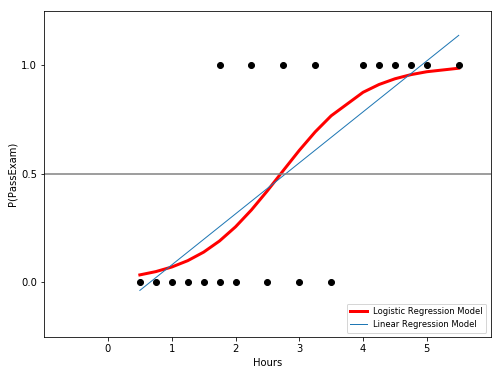

In [85]:
# plot the result 
#from http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(hours.ravel(), Exam_pass, color='black', zorder=20)

# plot sigmoid fit
def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(hours * logistic.coef_ + logistic.intercept_).ravel()
plt.plot(hours, loss, color='red', linewidth=3)

# plt.plot(hours, 1 / (1 + np.exp(-1*(hours * logistic.coef_ + logistic.intercept_))),color='red', linewidth=3)


# compare to ordinary linear model
ols = linear_model.LinearRegression()
ols.fit(hours, Exam_pass)
plt.plot(hours, ols.coef_ * hours + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('P(PassExam)')
plt.xlabel('Hours')
plt.xticks(range(0, 6))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-1, 6)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.show()

## 3. Multinomial Example

Now let's consider an example with multiple classes. For this, we'll consider the `iris` dataset provided in the sklearn datasets. Example link [here](http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html).

The `iris` dataset consists of 150 samples: 50 from each of three species of Iris flowers, and four features for each sample (Sepal Length, Sepal Width, Petal Length and Petal Width).


Thus, the dataset consists of three classes, four features, and 150 samples (50 for each class).

In [130]:
# import data to play with,
# Two features, and three classes.

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization purposes.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

print('Coefficients: \n', logreg.coef_,'\nIntercept:\n', logreg.intercept_)

Coefficients: 
 [[-30.61879527  27.54963779]
 [  0.14041199  -3.21392459]
 [  2.60373147  -0.74348327]] 
Intercept:
 [ 77.73711825   8.02399007 -14.19811218]


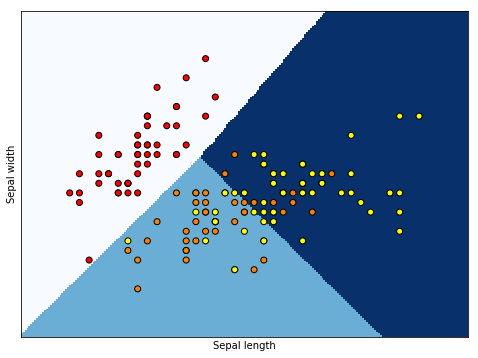

In [132]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Blues)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.autumn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

We can see that the clasifier did fairly well as a whole but still quite a few samples were missclassifed.

Now it's time to turn to other classification methods such as SVM, KNN,etc.
